In [43]:
import numpy as np
import matplotlib.pyplot as plt


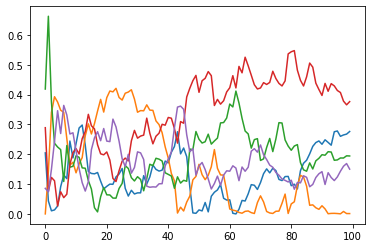

In [68]:
np.random.seed(123)
topics = 5
time_series = np.zeros((100,topics))
time_series[0,:] = np.random.dirichlet(np.array([0.2,0.2,0.3,0.5,0.4]))

for i in range(1,100):
    tmp = np.random.normal(loc = time_series[i-1,:], scale=1)
    if tmp.min() < 0:
        tmp+= np.random.uniform(-1.2*tmp.min(),-1.5*tmp.min())
    time_series[i,:] = tmp

time_series = time_series / time_series.sum(axis=1).reshape(-1,1)
plt.plot(time_series)
plt.show()

In [114]:
word_prod = np.zeros((100,5))
for i in range(topics):
    word_prod[i*20:(i+1)*20,i] = np.random.uniform(0.6,0.8,20)

In [126]:
for i in range(100):
    if i < 20:
        diff = (1-word_prod[0:20, 0]).reshape(-1,1)
        fill = np.random.dirichlet(np.array([1, 1, 1, 1]), size = 20) * diff
        
        word_prod[0:20, 1] = fill[:, 0]
        word_prod[0:20, 2] = fill[:, 1]
        word_prod[0:20, 3] = fill[:, 2]
        word_prod[0:20, 4] = fill[:, 3]
    
    if i > 20 and i < 40:
        diff = (1-word_prod[20:40, 1]).reshape(-1,1)
        fill = np.random.dirichlet(np.array([1, 1, 1, 1]), size = 20) * diff
        
        word_prod[20:40, 0] = fill[:, 0]
        word_prod[20:40, 2] = fill[:, 1]
        word_prod[20:40, 3] = fill[:, 2]
        word_prod[20:40, 4] = fill[:, 3]
        
    if i > 40 and i < 60:
        diff = (1-word_prod[40:60, 2]).reshape(-1,1)
        fill = np.random.dirichlet(np.array([1, 1, 1, 1]), size = 20) * diff
        
        word_prod[40:60, 0] = fill[:, 0]
        word_prod[40:60, 1] = fill[:, 1]
        word_prod[40:60, 3] = fill[:, 2]
        word_prod[40:60, 4] = fill[:, 3]
        
    if i > 60 and i < 80:
        diff = (1-word_prod[60:80, 3]).reshape(-1,1)
        fill = np.random.dirichlet(np.array([1, 1, 1, 1]), size = 20) * diff
        
        word_prod[60:80, 0] = fill[:, 0]
        word_prod[60:80, 1] = fill[:, 1]
        word_prod[60:80, 2] = fill[:, 2]
        word_prod[60:80, 4] = fill[:, 3]
        
    if i > 80:
        diff = (1-word_prod[80:100, 4]).reshape(-1,1)
        fill = np.random.dirichlet(np.array([1, 1, 1, 1]), size = 20) * diff
        
        word_prod[80:100, 0] = fill[:, 0]
        word_prod[80:100, 1] = fill[:, 1]
        word_prod[80:100, 2] = fill[:, 2]
        word_prod[80:100, 3] = fill[:, 3]

In [157]:
docs_time = np.asarray([np.random.choice(a = [0,1,2,3,4], p = ts, size = 25) for ts in time_series]).ravel()

In [163]:
bow = np.asarray([np.random.choice(a = np.arange(100), p = word_prod[:,doc]/np.sum(word_prod[:,doc]), size = 10) for doc in docs_time])
bow.shape

(2500, 10)